In [1]:
import pandas as pd
import scipy.stats as ss
import matplotlib
%matplotlib inline

matplotlib.rcParams["font.sans-serif"] = ["SimHei"]

In [2]:
ccss = pd.read_excel("CCSS_sample.xlsx",sheet_name = "CCSS")
ccss.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,上海,男,20,高中/中专,无业/待业/失业/家庭主妇,未婚,1000-1499元,0,...,1250.0,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,北京,女,65,大专,企/事业管理人员,已婚,1000-1499元,0,...,1250.0,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,上海,女,40,高中/中专,公司普通职员（白领）,已婚,99拒绝回答,0,...,NaN,100,100,100,100,150,100,85.917363,88.035919,84.749867


In [3]:
ccss.s3.mean()

36.358326068003485

In [5]:
ccss.groupby("s0").s3.mean()

s0
上海    37.759690
北京    36.431217
广州    34.866492
Name: s3, dtype: float64

In [6]:
ccss.groupby("s0")["s3","index1"].mean()

,s3,index1
s0,,
上海,37.759690,94.676615
北京,36.431217,97.592041
广州,34.866492,95.445562


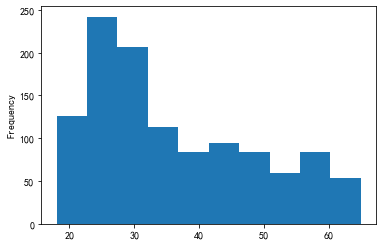

In [7]:
ccss.s3.plot.hist()

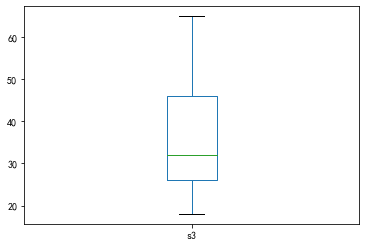

In [8]:
ccss.s3.plot.box()

In [9]:
ccss.describe()

,time,id,s3,a4,a8,a9,a10,a16,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,992.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,200778.085440,192.285092,36.358326,3.379250,3.250218,3.762860,3.326940,3.387969,7543.346774,117.088056,124.716652,122.798605,98.474281,140.932868,108.326068,95.893501,99.222697,94.059791
std,81.488785,258.900612,12.860567,2.479942,2.238250,2.202152,2.887416,1.917667,6987.619590,50.000647,44.816700,39.480886,50.820751,47.270174,34.296546,20.997097,28.433333,23.116453
min,200704.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200704.000000,73.000000,26.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3500.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.000000,85.917363,88.035919,84.749867
50%,200712.000000,151.000000,32.000000,3.000000,3.000000,3.000000,2.000000,3.000000,5500.000000,100.000000,100.000000,100.000000,100.000000,150.000000,100.000000,93.728032,88.035919,96.856991
75%,200812.000000,230.500000,46.000000,3.000000,3.000000,4.000000,3.000000,3.000000,9000.000000,150.000000,150.000000,150.000000,150.000000,200.000000,100.000000,109.349371,110.044898,108.964114
max,200912.000000,1570.000000,65.000000,9.000000,9.000000,9.000000,9.000000,9.000000,35000.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,156.213387,176.071837,145.285486


In [11]:
ccss.groupby("s0").s3.describe(percentiles = [.05,.1])

,count,mean,std,min,5%,10%,50%,max
s0,,,,,,,,
上海,387.0,37.759690,13.673530,18.0,21.0,23.0,33.0,65.0
北京,378.0,36.431217,13.129301,18.0,20.0,22.0,33.0,65.0
广州,382.0,34.866492,11.544072,18.0,21.0,23.0,32.0,65.0


In [13]:
from statsmodels.stats import weightstats as ws
des = ws.DescrStatsW(ccss.loc[:,["index1","index1a","index1b"]])
des.nobs
des.var

array([440.49372109, 807.74958831, 533.90452841])

In [14]:
ccss.time.value_counts()

200812    304
200712    304
200704    300
200912    239
Name: time, dtype: int64

In [22]:
ccss.s3.value_counts(bins = 20)

(22.7, 25.05]                  151
(29.75, 32.1]                  124
(25.05, 27.4]                   91
(27.4, 29.75]                   83
(20.35, 22.7]                   70
(34.45, 36.8]                   67
(43.85, 46.2]                   62
(17.951999999999998, 20.35]     56
(57.95, 60.3]                   56
(48.55, 50.9]                   53
(39.15, 41.5]                   49
(32.1, 34.45]                   46
(36.8, 39.15]                   35
(41.5, 43.85]                   32
(46.2, 48.55]                   31
(62.65, 65.0]                   31
(53.25, 55.6]                   30
(50.9, 53.25]                   29
(55.6, 57.95]                   28
(60.3, 62.65]                   23
Name: s3, dtype: int64

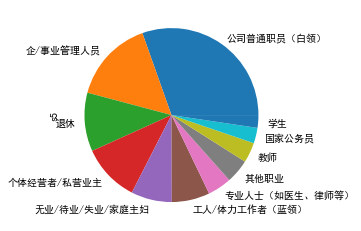

In [23]:
ccss.s5.value_counts().plot.pie()

In [24]:
pd.crosstab(ccss.s2,ccss.s0)

s0,上海,北京,广州
s2,,,
女,166,190,154
男,221,188,228


In [25]:
pd.crosstab(ccss.s2,ccss.s0,normalize = 0,margins = True)

s0,上海,北京,广州
s2,,,
女,0.325490,0.372549,0.301961
男,0.346939,0.295133,0.357928
All,0.337402,0.329555,0.333043


In [28]:
pd.crosstab([ccss.s2,ccss.O1],[ccss.s0,ccss.s5])

s0               上海                                                            \
s5    专业人士（如医生、律师等） 个体经营者/私营业主 企/事业管理人员 公司普通职员（白领） 其他职业 国家公务员 学生 工人/体力工作者（蓝领）   
s2 O1                                                                           
女  有              0          2        9         10    2     3  1            1   
   没有             3         11       10         54    3     3  2            7   
男  有              4         15       16         14    0     1  1            1   
   没有             6         13       29         45    9     1  6           15   

s0                      ...         广州                                    \
s5    教师 无业/待业/失业/家庭主妇  ... 个体经营者/私营业主 企/事业管理人员 公司普通职员（白领） 其他职业 国家公务员 学生   
s2 O1                   ...                                                
女  有   1             2  ...          2        3         11    3     0  1   
   没有  2             9  ...          8       12         41    3     0  1   
男  有   2             0  ...         16       18         23    2     3  2   
   没有  7            13  ...         21       26         40   10     7  4   

s0                                       
s5    工人/体力工作者（蓝领） 教师 无业/待业/失业/家庭主妇  退休  
s2 O1                                    
女  有             0  1             9   1  
   没有           13  3            14  18  
男  有             0  2             0   1  
   没有           16  6            13   6  

[4 rows x 33 columns]

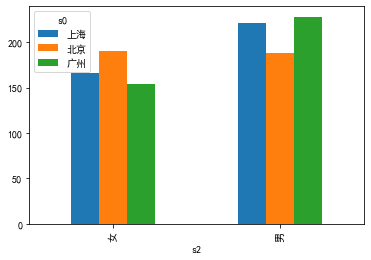

In [27]:
pd.crosstab(ccss.s2,ccss.s0).plot.bar()

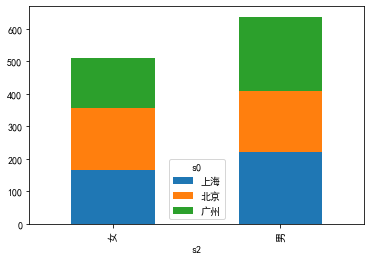

In [29]:
pd.crosstab(ccss.s2,ccss.s0).plot.bar(stacked = True)

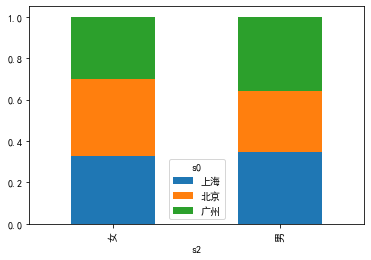

In [30]:
pd.crosstab(ccss.s2,ccss.s0,normalize = 0).plot.bar(stacked = True)

In [32]:
ccss.query("s0 == '广州' & time == 200704").index1.describe()

count    100.000000
mean      97.164727
std       20.808324
min       31.242677
25%       85.917363
50%      101.538702
75%      109.349371
max      140.592049
Name: index1, dtype: float64

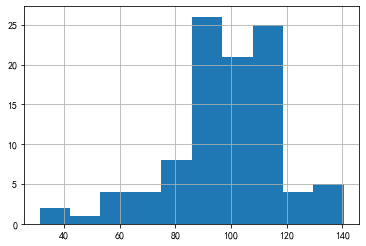

In [33]:
ccss.query("s0 == '广州' & time == 200704").index1.hist()

In [34]:
from scipy import stats as ss
ss.ttest_1samp(ccss.query("s0 == '广州' & time == 200704").index1,100) # 100 中出现17.6次

Ttest_1sampResult(statistic=-1.3625667518512996, pvalue=0.17611075148299993)

In [36]:
from statsmodels.stats import weightstats as ws
des = ws.DescrStatsW(ccss.query("s0 == '广州' & time == 200704").index1)
des.mean

97.16472701710536

In [37]:
des.tconfint_mean()

(93.03590418536487, 101.29354984884586)

In [38]:
des.ttest_mean(100)

(-1.3625667518512996, 0.17611075148299993, 99.0)

In [39]:
des.ttest_mean(100,"smaller")

(-1.3625667518512996, 0.08805537574149996, 99.0)

In [40]:
des.ttest_mean(100,"larger")

(-1.3625667518512996, 0.9119446242585001, 99.0)

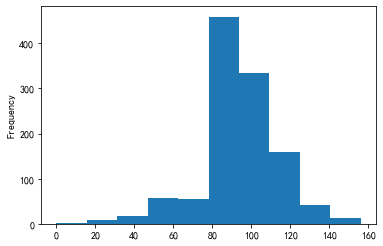

In [41]:
ccss.index1.plot.hist()

In [43]:
ccss.groupby("s7").index1.describe()

,count,mean,std,min,25%,50%,75%,max
s7,,,,,,,,
已婚,790.0,95.033106,21.282487,0.000000,85.917363,93.728032,109.349371,156.213387
未婚,343.0,98.282359,19.959824,23.432008,85.917363,101.538702,109.349371,156.213387
离异/分居/丧偶,14.0,85.917363,24.316544,31.242677,72.248692,85.917363,101.538702,124.970710


In [45]:
# 方差齐检验
ss.levene(ccss.index1[ccss.s7 == '未婚'],ccss.index1[ccss.s7=="已婚"])

LeveneResult(statistic=0.6178737960192996, pvalue=0.43200314605212653)

In [46]:
ss.ttest_ind(ccss.index1[ccss.s7 == "未婚"],ccss.index1[ccss.s7=="已婚"])

Ttest_indResult(statistic=2.405261376009453, pvalue=0.016320721789339597)

In [48]:
# 校正T检验
ss.ttest_ind(ccss.index1[ccss.s7 == "未婚"],ccss.index1[ccss.s7=="已婚"],equal_var = False)

Ttest_indResult(statistic=2.4669071564965845, pvalue=0.013870360692360313)

In [50]:
ss.ttest_ind_from_stats(95.033106,21.282487,790,
                       98.282359,19.959824,343)

Ttest_indResult(statistic=-2.4052618666155126, pvalue=0.016320699991532902)

In [51]:
d1 = ws.DescrStatsW(ccss.index1[ccss.s7 == '未婚'])
d2 = ws.DescrStatsW(ccss.index1[ccss.s7 == '已婚'])

comp = ws.CompareMeans(d1,d2)
comp.ttest_ind()

(2.4052613760094634, 0.01632072178933914, 1131.0)

In [52]:
comp.ttest_ind(usevar = 'unequal')

(2.4669071564965956, 0.013870360692359867, 690.0875759383671)

In [53]:
ccss_p = pd.read_excel("CCSS_sample.xlsx",sheet_name = "CCSS_pair")
ccss_p.head()

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
0,200704,22,2,59,100,100,100,100,50,70.296024,66.026939,72.642743,50,100,100,100,100,70.296024,66.026939,72.642743
1,200704,40,2,28,150,150,150,150,100,109.349371,110.044898,108.964114,150,100,100,200,100,101.538702,110.044898,96.856991
2,200704,45,1,55,100,50,50,100,200,78.106694,132.053878,48.428495,150,100,150,150,100,101.538702,110.044898,96.856991
3,200704,69,1,26,150,200,150,50,100,101.538702,110.044898,96.856991,150,100,150,200,200,124.970710,154.062858,108.964114
4,200704,98,1,63,100,200,150,150,100,109.349371,88.035919,121.071238,150,150,100,0,100,78.106694,110.044898,60.535619


In [54]:
ccss_p.loc[:,["index1","index1n"]].describe()

,index1,index1n
count,88.000000,88.000000
mean,98.787216,96.035730
std,16.152752,20.102950
min,70.296024,39.053347
25%,85.917363,85.917363
50%,101.538702,93.728032
75%,109.349371,109.349371
max,132.781379,132.781379


In [58]:
ss.pearsonr(ccss_p.index1,ccss_p.index1n)

(0.26380117986159085, 0.013011623679509974)

In [59]:
ss.ttest_rel(ccss_p.index1,ccss_p.index1n)

Ttest_relResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

In [61]:
ss.ttest_1samp(ccss_p.index1 - ccss_p.index1n,0)

Ttest_1sampResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

In [64]:
des = ws.DescrStatsW(ccss_p.index1 - ccss_p.index1n)
des.ttest_mean()

(1.1616334792419987, 0.2485614438619105, 87.0)